# STAT207 Mini-Project #1 - INSERT TITLE HERE


YOUR NAME

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

For this project, I chose the video games dataset provided to us. This dataset was collected by Dr. Joe Cox and made into a csv file by Austin Cory Bart. Using this dataset, I plan to see how the nature of the relationship between 'Metrics.Sale' and 'Metrics.Review.Score' change for different values of 'Metadata.Publishers'. Many games are picked up by gamers since they trust a certain company to make great games like Nintendo, but they also make it more expensive. I want to see if this is true and that major companies like Nintendo consistently make higher rated games and if it is more expensive than others. This is useful for Metadata Publishers that are planning on releasing a game since they will be able to accurately label prices on their games based on how well known they may be or how good their game is. 

## 2. Dataset Discussion

In [2]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
list(df.columns)

['Title',
 'Features.Handheld?',
 'Features.Max Players',
 'Features.Multiplatform?',
 'Features.Online?',
 'Metadata.Genres',
 'Metadata.Licensed?',
 'Metadata.Publishers',
 'Metadata.Sequel?',
 'Metrics.Review Score',
 'Metrics.Sales',
 'Metrics.Used Price',
 'Release.Console',
 'Release.Rating',
 'Release.Re-release?',
 'Release.Year',
 'Length.All PlayStyles.Average',
 'Length.All PlayStyles.Leisure',
 'Length.All PlayStyles.Median',
 'Length.All PlayStyles.Polled',
 'Length.All PlayStyles.Rushed',
 'Length.Completionists.Average',
 'Length.Completionists.Leisure',
 'Length.Completionists.Median',
 'Length.Completionists.Polled',
 'Length.Completionists.Rushed',
 'Length.Main + Extras.Average',
 'Length.Main + Extras.Leisure',
 'Length.Main + Extras.Median',
 'Length.Main + Extras.Polled',
 'Length.Main + Extras.Rushed',
 'Length.Main Story.Average',
 'Length.Main Story.Leisure',
 'Length.Main Story.Median',
 'Length.Main Story.Polled',
 'Length.Main Story.Rushed']

In [4]:
df.shape

(1212, 36)

I got this dataset from this link (https://corgis-edu.github.io/corgis/csv/video_games/) on 2/10/2024. There are 1212 rows and 36 columns in the dataset without any cleaning. Each row in the dataset represents one game observed. This data came from crowd sourcing which is obtaining data from a large group of people through methods like surveys. The three variables I intend to explore deeper are the total amount made from the game in millions, a rating out of 100 for the game, and the company that published the game. 

## 3. Dataset Cleaning

While cleaning the dataset, I noticed one explicit missing value (nan) and there were no implicit missing values. The pros of removing the explicit missing values is that they make the data inaccurate because we won't know the name of the Publishers, but removing them means that we do lose data. I eneded up removing them since we still have almost 1000 data points which can still show accurate data. After cleaning the sample sizes, I came to drop another 20 games from the dataset. Finally, I decided to look at the box plots for both numerical values and I decided to not drop any of the outliers. The Review Score shows only two outliers that are not too far off from the first quartile range. The Total Sales variable has too many outliers at a large range so I believe that all of the data will be useful and if we drop any, we won't have enough data points. Even after seeing the outliers in the scatter plot, I think that it shows better that sometimess, branding may be more of a factor to better sales to a game than the quality of the game. 

In [5]:
# Filter DataFrame to only be the variables we want
df_filter = df[['Metrics.Sales', 'Metrics.Review Score', 'Metadata.Publishers']]
df_filter.head()

,Metrics.Sales,Metrics.Review Score,Metadata.Publishers
0,4.69,85,Nintendo
1,0.56,89,Ubisoft
2,0.54,81,Nintendo
3,0.49,81,Sony
4,0.45,61,Activision


In [6]:
# Check for any values we ned to make N/A
df_filter['Metadata.Publishers'].unique()
# No implicit N/A values

array(['Nintendo', 'Ubisoft', 'Sony', 'Activision', 'EA', 'Namco',
       'Konami', nan, 'Sega', 'Capcom', 'Capcom,Rockstar',
       'Activision,Konami', 'Rockstar', 'THQ', 'Microsoft',
       'Activision,Sony', '2K', 'Atari', 'SquareEnix', 'EA,Namco',
       'Namco,Sony', 'Midway', 'Eidos', 'Sony,Ubisoft',
       'Nintendo,SquareEnix', 'EA,Sony', 'Microsoft,SquareEnix',
       'Atari,Namco', 'Nintendo,Sega', 'Capcom,Nintendo', 'Disney',
       'Namco,Ubisoft'], dtype=object)

In [7]:
# Drop N/A values
df_cleanfilter = df_filter.dropna()
df_cleanfilter.head()

,Metrics.Sales,Metrics.Review Score,Metadata.Publishers
0,4.69,85,Nintendo
1,0.56,89,Ubisoft
2,0.54,81,Nintendo
3,0.49,81,Sony
4,0.45,61,Activision


In [8]:
df_cleanfilter.shape[0]

948

In [9]:
df_filter.shape[0] - df_cleanfilter.shape[0]

264

In [10]:
# Sample Size Cleaning
df_count = df_cleanfilter['Metadata.Publishers'].value_counts()
sizefilter = df_count[df_count >= 10].index
df_sizefilter = df_cleanfilter[df_cleanfilter['Metadata.Publishers'].isin(sizefilter)]
df_sizefilter

,Metrics.Sales,Metrics.Review Score,Metadata.Publishers
0,4.69,85,Nintendo
1,0.56,89,Ubisoft
2,0.54,81,Nintendo
3,0.49,81,Sony
4,0.45,61,Activision
...,...,...,...
1195,0.04,67,Eidos
1197,0.04,42,Konami
1199,0.04,68,EA
1204,0.03,58,Ubisoft


In [11]:
df_sizefilter.shape[0]

928

In [12]:
# Total rows dropped
df_filter.shape[0] - df_sizefilter.shape[0]

284

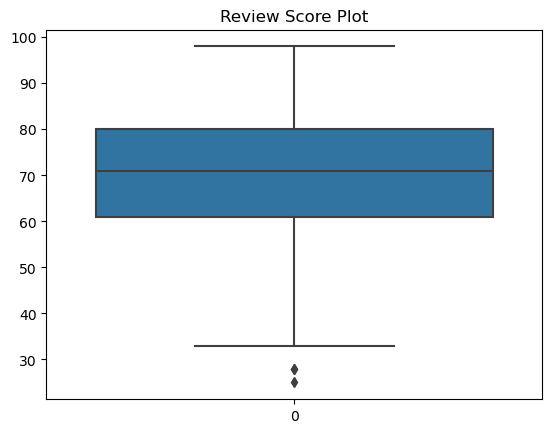

In [88]:
sns.boxplot(data = df_sizefilter['Metrics.Review Score'])
plt.title('Review Score Plot')
plt.show()

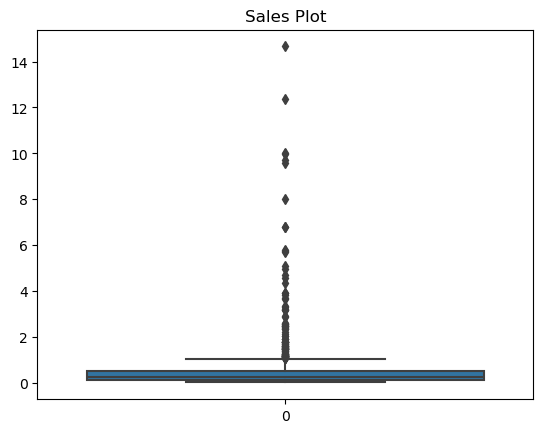

In [87]:
sns.boxplot(data = df_sizefilter['Metrics.Sales'])
plt.title('Sales Plot')
plt.show()


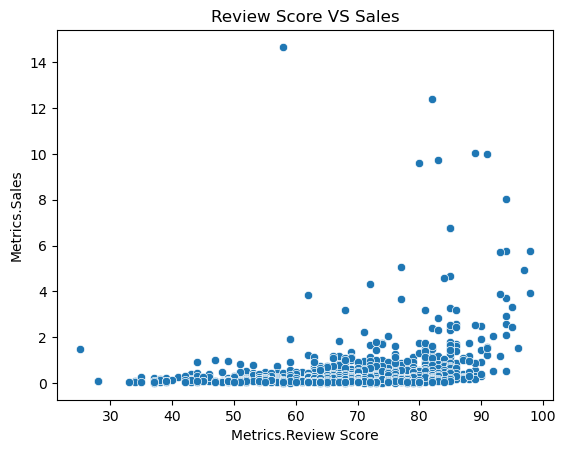

In [86]:
sns.scatterplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', data = df_sizefilter)
plt.title('Review Score VS Sales')
plt.show()

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

In this section, I figured out how the relationship between 'Metrics.Sales' and 'Metrics.Review Score' change based on different values of 'Metadata.Publishers'. Since there are so many different companies and games that are still included in the dataset, I decided to clean it to the top 5 companies. This made the scatterplot more readable. I ended up making different graphs for each of the Publishers. All of the graphs had more of a positive direction, Sega was very close to being linear but was still positive. The shape of all the relationships were linear. I calculated the strengths of the Publishers using the correlation, which in order from highest to lowest were Activision, Ubisoft, EA, Nintendo, then Sega. Most of the graphs also had outliers in them, these represented games that made a lot of money despite not being the best quality from reviews. Many of these could be seen with Nintendo and Sega, which also shows why they had such low correlations. Finally, the slopes were also different for all the graphs, the highest to lowest were: Nintendo, Activision, Ubisoft, EA, then Sega. 

In [37]:
df_sort = df_sizefilter.groupby('Metadata.Publishers').agg('count').reset_index().sort_values(by = 'Metrics.Sales', ascending = False).head()
top5 = df_sort['Metadata.Publishers'].values
top5

array(['EA', 'Ubisoft', 'Activision', 'Nintendo', 'Sega'], dtype=object)

In [38]:
df_top5 = df_sizefilter[df_sizefilter["Metadata.Publishers"].isin(top5)]
df_top5

,Metrics.Sales,Metrics.Review Score,Metadata.Publishers
0,4.69,85,Nintendo
1,0.56,89,Ubisoft
2,0.54,81,Nintendo
4,0.45,61,Activision
5,0.41,67,EA
...,...,...,...
1180,0.05,75,EA
1185,0.05,62,Ubisoft
1189,0.05,64,Ubisoft
1199,0.04,68,EA


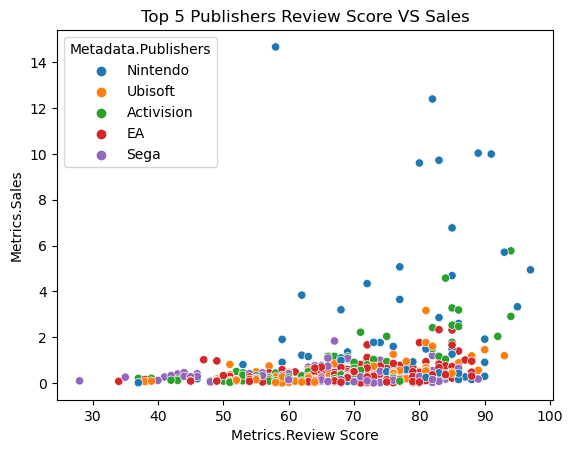

In [80]:
sns.scatterplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', data = df_top5)
plt.title('Top 5 Publishers Review Score VS Sales')
plt.show()

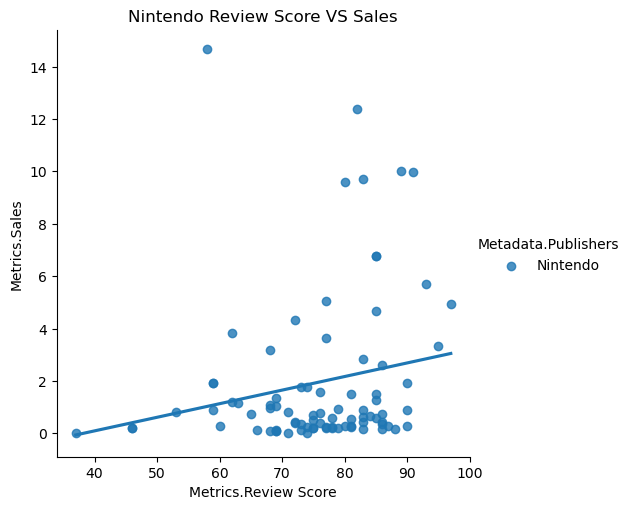

In [81]:
sns.lmplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', ci = False, data = df_top5[df_top5['Metadata.Publishers'] == "Nintendo"])
plt.title('Nintendo Review Score VS Sales')
plt.show()

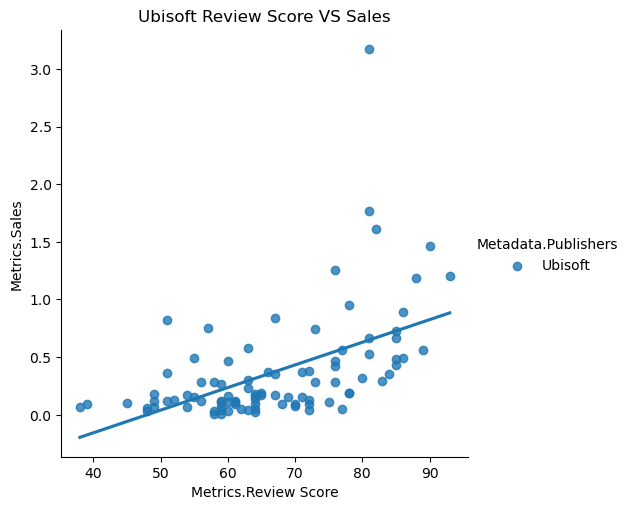

In [82]:
sns.lmplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', ci = False, data = df_top5[df_top5['Metadata.Publishers'] == "Ubisoft"])
plt.title('Ubisoft Review Score VS Sales')
plt.show()

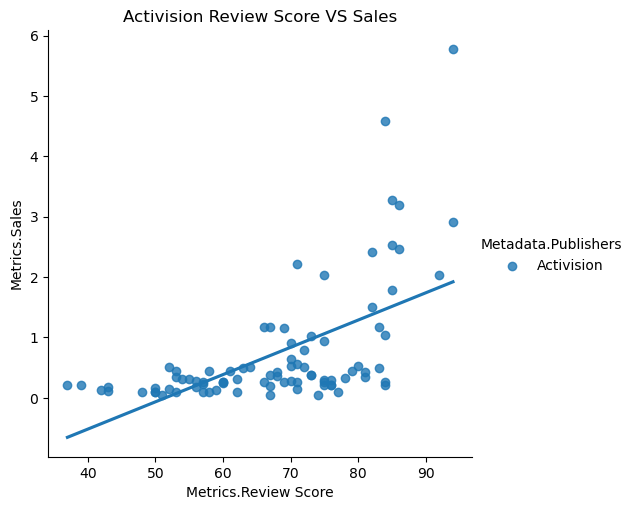

In [83]:
sns.lmplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', ci = False, data = df_top5[df_top5['Metadata.Publishers'] == "Activision"])
plt.title('Activision Review Score VS Sales')
plt.show()

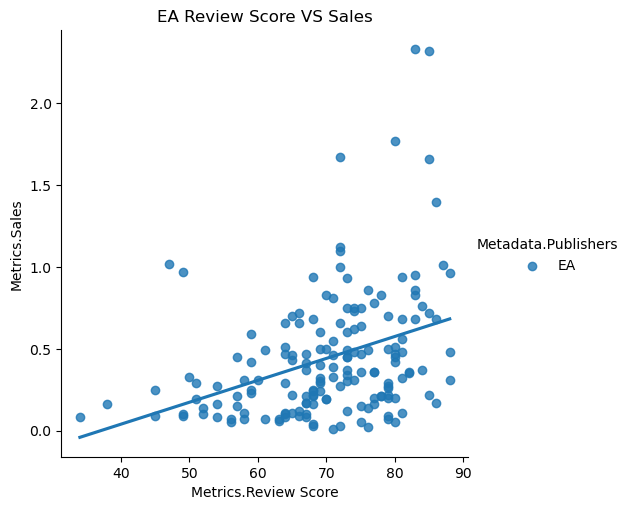

In [84]:
sns.lmplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', ci = False, data = df_top5[df_top5['Metadata.Publishers'] == "EA"])
plt.title('EA Review Score VS Sales')
plt.show()

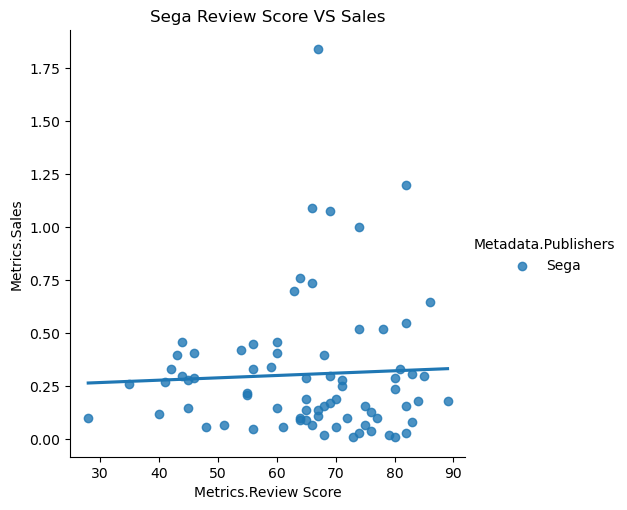

In [85]:
sns.lmplot(y = 'Metrics.Sales', x = 'Metrics.Review Score', hue = 'Metadata.Publishers', ci = False, data = df_top5[df_top5['Metadata.Publishers'] == "Sega"])
plt.title('Sega Review Score VS Sales')
plt.show()

In [66]:
df_top5.groupby('Metadata.Publishers').corr()

Metrics.Sales  Metrics.Review Score
Metadata.Publishers                                                          
Activision          Metrics.Sales              1.000000              0.583970
                    Metrics.Review Score       0.583970              1.000000
EA                  Metrics.Sales              1.000000              0.360231
                    Metrics.Review Score       0.360231              1.000000
Nintendo            Metrics.Sales              1.000000              0.194062
                    Metrics.Review Score       0.194062              1.000000
Sega                Metrics.Sales              1.000000              0.048198
                    Metrics.Review Score       0.048198              1.000000
Ubisoft             Metrics.Sales              1.000000              0.513664
                    Metrics.Review Score       0.513664              1.000000

In [78]:
df_all = pd.concat([df_top5[df_top5['Metadata.Publishers'] == 'Activision'].describe(), df_top5[df_top5['Metadata.Publishers'] == 'Ubisoft'].describe(), df_top5[df_top5['Metadata.Publishers'] == 'EA'].describe(),
                    df_top5[df_top5['Metadata.Publishers'] == 'Nintendo'].describe(), df_top5[df_top5['Metadata.Publishers'] == 'Sega'].describe()], 
                   axis='columns', keys=['Activision', 'Ubisoft', 'EA', 'Nintendo', 'Sega'])
df_all

Activision                            Ubisoft                       \
      Metrics.Sales Metrics.Review Score Metrics.Sales Metrics.Review Score   
count     87.000000            87.000000     92.000000            92.000000   
mean       0.739195            67.839080      0.369891            66.826087   
std        1.020723            13.190795      0.472307            12.356080   
min        0.040000            37.000000      0.010000            38.000000   
25%        0.210000            57.500000      0.090000            59.000000   
50%        0.330000            70.000000      0.180000            64.500000   
75%        0.725000            76.500000      0.472500            76.250000   
max        5.770000            94.000000      3.170000            93.000000   

                 EA                           Nintendo                       \
      Metrics.Sales Metrics.Review Score Metrics.Sales Metrics.Review Score   
count    165.000000           165.000000     85.000000            85.000000   
mean       0.443515            70.175758      1.951294            75.729412   
std        0.392408            10.543147      3.000850            11.232805   
min        0.010000            34.000000      0.010000            37.000000   
25%        0.170000            65.000000      0.260000            69.000000   
50%        0.340000            71.000000      0.750000            77.000000   
75%        0.620000            79.000000      1.910000            84.000000   
max        2.330000            88.000000     14.660000            97.000000   

               Sega                       
      Metrics.Sales Metrics.Review Score  
count     75.000000            75.000000  
mean       0.307600            65.320000  
std        0.317485            13.800862  
min        0.010000            28.000000  
25%        0.100000            56.000000  
50%        0.220000            67.000000  
75%        0.400000            75.500000  
max        1.840000            89.000000

## 5. Conclusion

Throughout this research process, I noticed that many companies like Nintendo and Sega do not follow a relationship between Sales and Review Score. All the companies show a positive relationship between Review Score and Sales, showing that typically a higher reviewed game will lead to more sales of it. In the top 5 Publishers reviewed, it is noticed that Ubisoft and Activision mostly follow the trend with a few outliers at the end, further showing that well made games typically make more money. Other Publishers such as Nintendo, Sega, and EA show that sometimes poorly made games can still make lots of money and break the trend. Despite all this, we see there is a slight change between the relationship of Review Score and Sales when the Publisher changes. We can also see that many companies just make more than other companies. Activision and Ubisot have similar mean Review Scores, but their mean sales differ by 2x. As for shortcomings, it was hard to analyze so many datapoints and companies, it might have been better to do only 3 or just change different variables to examine. This answers my question from before showing that certain companies will have more game sales regardless of Review Score, and that some companies can sacrifice Review Score due to their large name